In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
import seaborn as sns

In [6]:
#base_dir = '/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/' #Alice
base_dir = '/home/srashti.goyal/strong-lensing-ml/' #CIT

In [7]:
def chirptime_from_mass_forb(chirp_mass, forb=10):
    return (5./256) * chirp_mass**(-5./3) * (2*np.pi*forb)    

In [ ]:
import pycbc.conversions as convert

# Loading test set

In [9]:
lensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/lensed_inj_data.npz'))
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))


In [10]:
df_test=pd.read_csv(base_dir + 'data/dataframes/test/ML_combined_kaggle.csv',index_col=0)
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

In [11]:
df_test_old=pd.read_csv(base_dir + 'data/dataframes/test/MLEs_haris_et_al_inc_mchirp_inc_bhattacharya.csv',index_col=0)
df_test_old.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'img_0', 'img_1', 'Lensing', 'pe_skymaps_blu',
       ...
       'costheta_jn_MLE_img_0', 'costheta_jn_MLE_img_1', 'logl_MLE_img_0',
       'logl_MLE_img_1', 'matched_filter_snr_MLE_img_0',
       'matched_filter_snr_MLE_img_1', 'mchirp_MLE_img_1', 'mchirp_MLE_img_0',
       'mchirp_abs_diff', 'bhattacharya_coeff'],
      dtype='object', length=116)

In [12]:
df_test_old.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'img_0', 'img_1', 'Lensing',
       'pe_skymaps_blu', 'pe_skymaps_d2', 'pe_skymaps_lsq',
       'pe_skymaps_d3', 'bayestar_skymaps_blu', 'bayestar_skymaps_d2',
       'bayestar_skymaps_lsq', 'bayestar_skymaps_d3', 'BLU_ra_dec',
       '# dist_sq', 'dist_sq_alpha_inj', 'dist_sq_alpha_marg',
       'costheta_jn', 'costheta_jn, dist_sq',
       'costheta_jn, dist_sq_alpha_inj',
       'costheta_jn, dist_sq_alpha_marg',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq_alpha_inj',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq_alpha_marg',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       'all x dist_alpha_inj', 'all x dist'

In [13]:
cols_old = ['img_0', 'img_1', 'Lensing','m1_MLE_img_0',
       'm1_MLE_img_1', 'm2_MLE_img_0', 'm2_MLE_img_1', 'ra_MLE_img_0',
       'ra_MLE_img_1', 'dec_MLE_img_0', 'dec_MLE_img_1', 'a1_MLE_img_0',
       'a1_MLE_img_1', 'a2_MLE_img_0', 'a2_MLE_img_1',
       'costilt1_MLE_img_0', 'costilt1_MLE_img_1', 'costilt2_MLE_img_0',
       'costilt2_MLE_img_1', 'costheta_jn_MLE_img_0',
       'costheta_jn_MLE_img_1', 'logl_MLE_img_0', 'logl_MLE_img_1',
       'matched_filter_snr_MLE_img_0', 'matched_filter_snr_MLE_img_1',
       'mchirp_MLE_img_1', 'mchirp_MLE_img_0', 'mchirp_abs_diff',
       'bhattacharya_coeff']

In [14]:
df_test_old.tail()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,img_0,img_1,Lensing,pe_skymaps_blu,...,costheta_jn_MLE_img_0,costheta_jn_MLE_img_1,logl_MLE_img_0,logl_MLE_img_1,matched_filter_snr_MLE_img_0,matched_filter_snr_MLE_img_1,mchirp_MLE_img_1,mchirp_MLE_img_0,mchirp_abs_diff,bhattacharya_coeff
499787,499787,499787,499787,499787,499787,499787,653529000.000000000-307058,521844500.000000000-43689,0,4.424560e-05,...,-0.361726,0.553313,-96105.624454,-96457.305267,8.958544,13.493710,15.741955,81.152666,65.410711,397.019995
499788,499788,499788,499788,499788,499788,499788,618708500.000000000-237417,570250500.000000000-140501,0,8.463995e-173,...,0.413433,0.063741,-95843.275377,-96636.446939,11.169069,11.188854,41.695815,83.559880,41.864065,87.297127
499789,499789,499789,499789,499789,499789,499789,624034000.000000000-248068,658017500.000000000-316035,0,1.657877e-01,...,0.032677,-0.269847,-95913.258227,-96984.749083,17.228599,8.448177,39.887554,13.151348,26.736206,727.311814
499790,499790,499790,499790,499790,499790,499790,531573500.000000000-63147,602280500.000000000-204561,0,0.000000e+00,...,-0.747540,0.439526,-96809.245744,-96305.873848,17.439649,9.686203,83.329568,7.500795,75.828773,421.913615
499791,499791,499791,499791,499791,499791,499791,625278000.000000000-250556,549574500.000000000-99149,0,1.231912e-11,...,-0.082464,-0.082024,-96488.693830,-96361.186208,9.575480,15.136830,37.680049,72.474372,34.794323,112.720401


In [15]:
df_test=pd.merge(df_test,df_test_old[cols_old],on=['img_0','img_1','Lensing'])

## Skyfeatures statistics

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


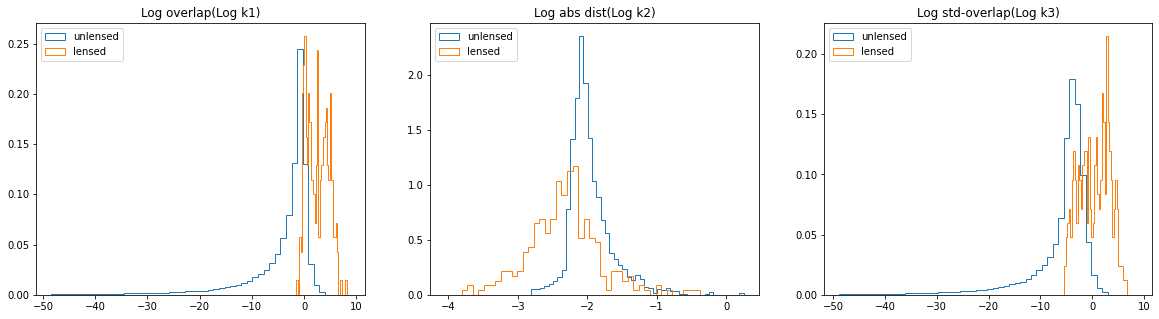

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log overlap(Log k1)')
plt.subplot(132)
stat='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log abs dist(Log k2)')
plt.subplot(133)
stat='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
bins=np.linspace(np.percentile(np.log(df[stat]),1),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='unlensed',density=True)
df=df_test[df_test['Lensing'] == 1]
bins=np.linspace(np.percentile(np.log(df[stat]),0.01),np.percentile(np.log(df[stat]),99.9),50)
plt.hist(np.log(df[stat]),bins=bins,histtype='step',label='lensed',density=True)
plt.legend()
plt.title('Log std-overlap(Log k3)')
plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


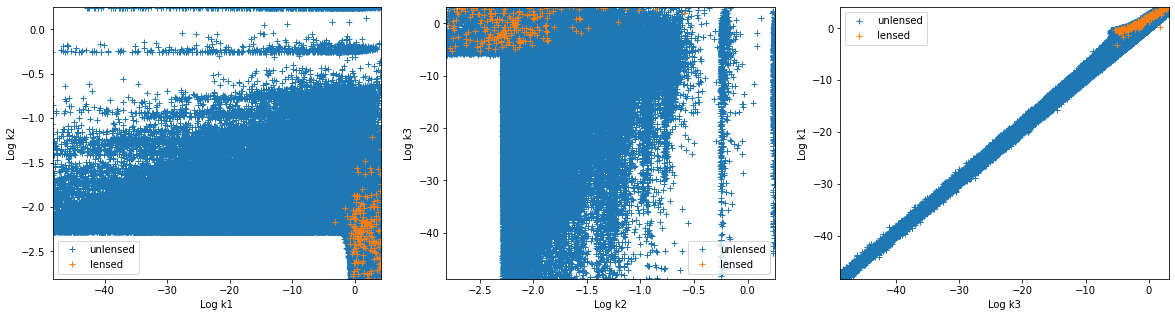

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(131)
stat1='bayestar_skymaps_blu'
stat2='bayestar_skymaps_lsq'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k1')
plt.ylabel('Log k2')
plt.legend()
plt.subplot(132)
stat1='bayestar_skymaps_lsq'
stat2='bayestar_skymaps_d3'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k2')
plt.ylabel('Log k3')
plt.legend()
plt.subplot(133)
stat1='bayestar_skymaps_d3'
stat2='bayestar_skymaps_blu'
df=df_test[df_test['Lensing'] == 0]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C0',label='unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.plot(np.log(df[stat1]),np.log(df[stat2]),'+',color='C1',label='lensed')
plt.xlim(np.percentile(np.log(df_test[stat1]),1),np.percentile(np.log(df_test[stat1]),99.9))
plt.ylim(np.percentile(np.log(df_test[stat2]),1),np.percentile(np.log(df_test[stat2]),99.9))
plt.xlabel('Log k3')
plt.ylabel('Log k1')
plt.legend()
plt.show()

## BLU and ML FPPs comparison for test set

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


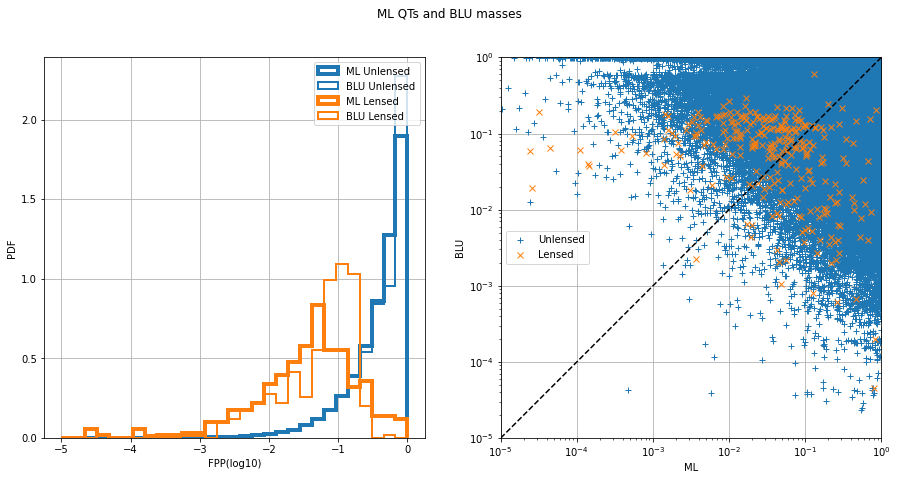

In [18]:
blu_stat='m1, m2'
ml_stat='xgb_dense_QTS_0'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


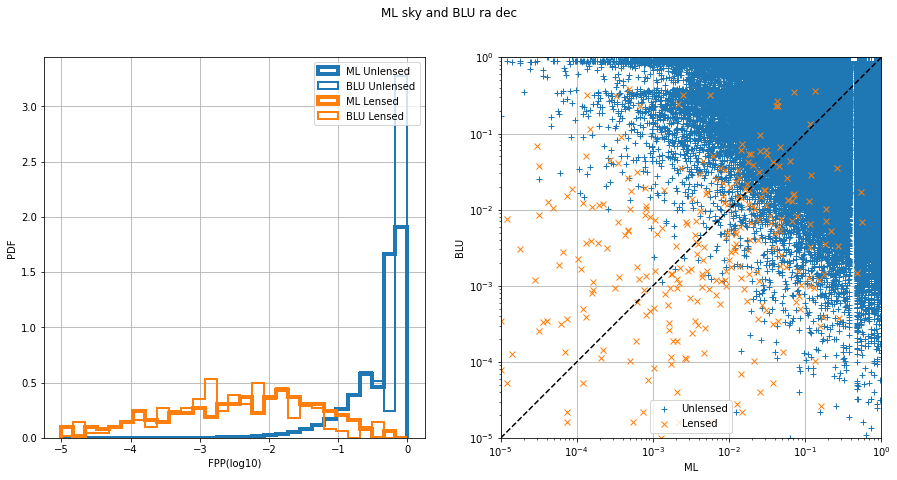

In [19]:
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.loglog(10**bins,10**bins,'k--')
plt.xlabel('ML')
plt.ylabel('BLU')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)

plt.grid()
plt.suptitle('ML sky and BLU ra dec')

plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


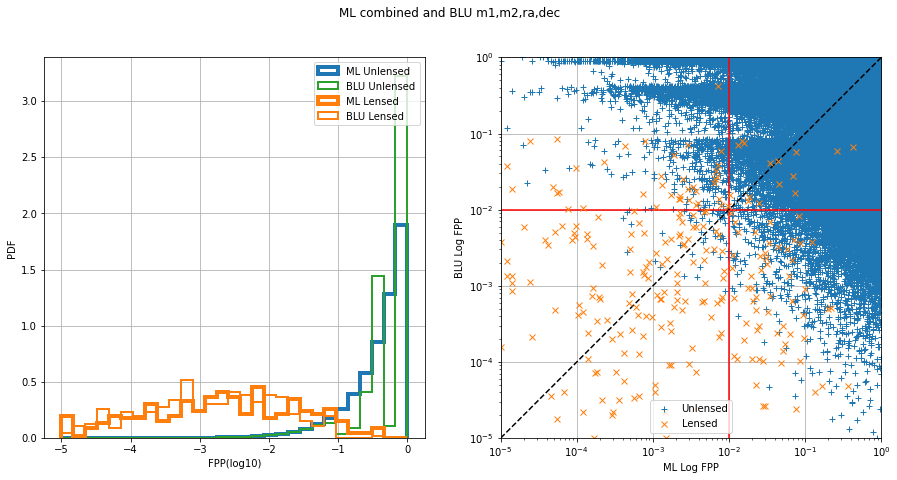

In [20]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C2',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r')
plt.axhline(1e-2,color='r')

plt.loglog(10**bins,10**bins,'k--')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('ML combined and BLU m1,m2,ra,dec')

plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


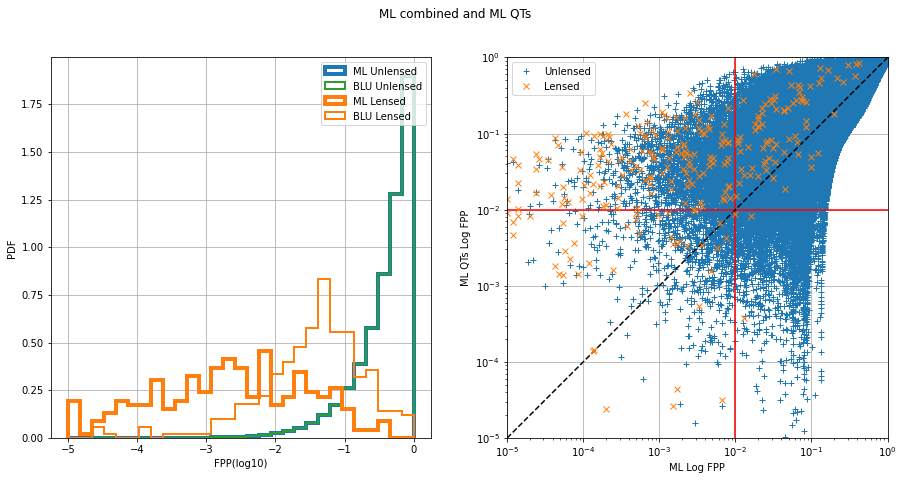

In [21]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'xgb_dense_QTS_0'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C2',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r')
plt.axhline(1e-2,color='r')

plt.loglog(10**bins,10**bins,'k--')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('ML QTs Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('ML combined and ML QTs')

plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


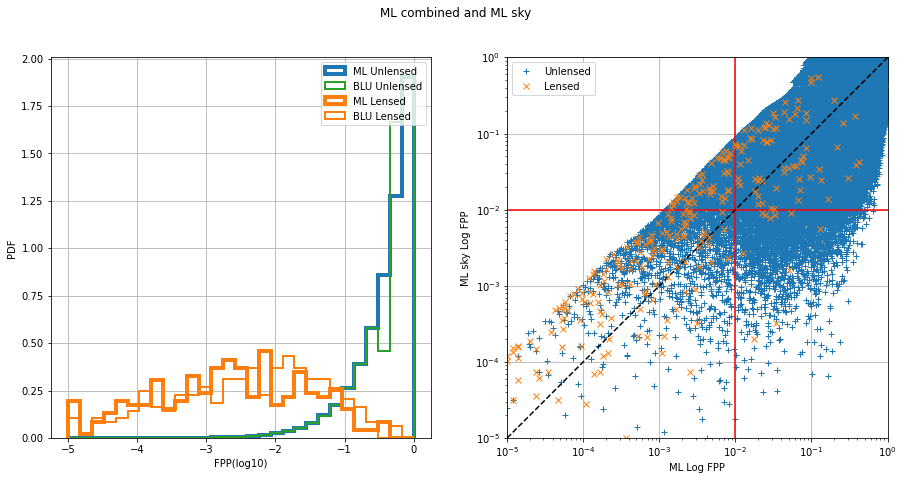

In [22]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'xgb_pred_bayestar_skymaps'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C2',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r')
plt.axhline(1e-2,color='r')

plt.loglog(10**bins,10**bins,'k--')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('ML sky Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('ML combined and ML sky')

plt.show()

## Elimination and identification by BLU and ML

In [23]:
df=df_test[df_test['Lensing'] == 0]
common_ul_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common unlensed fraction i.e. weed out by ML & BLU: %.3f'%common_ul_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac_sel=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' common lensed fraction i.e. identified by ML & BLU: %.3f'%common_l_frac_sel)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' common lensed fraction i.e. weed out by ML & BLU: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']<1e-2) & (df[blu_stat+'_fpp']>1e-2)])/len(df)
print(' lensed fraction i.e. weed out by BLU but identified by ML: %.3f'%common_l_frac)

df=df_test[df_test['Lensing'] == 1]
common_l_frac=len(df[(df[ml_stat+'_fpp']>1e-2) & (df[blu_stat+'_fpp']<1e-2)])/len(df)
print(' lensed fraction i.e. weed out by ML but identified by BLU: %.3f'%common_l_frac)

 common unlensed fraction i.e. weed out by ML & BLU: 0.984
 common lensed fraction i.e. identified by ML & BLU: 0.565
 common lensed fraction i.e. weed out by ML & BLU: 0.243
 lensed fraction i.e. weed out by BLU but identified by ML: 0.158
 lensed fraction i.e. weed out by ML but identified by BLU: 0.034


## Investigating high FPP lensed events as classified by ML and BLU

In [24]:
df_lensed=df_test[df_test['Lensing'] == 1]


In [25]:
tags=df_lensed['img_0'].str.rsplit('_',1).values


In [26]:
ids=[]
event_tags=[]
for event in tags:
    event_tag=event[0]
    idx=np.where(event_tag==lensed_data_haris['event_tag'])[0][0]
    ids.append(idx),event_tags.append(event_tag)
df_lensed['inj_id']=ids
df_lensed['event_tag'] = event_tags
df_lensed.tail()

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,logl_MLE_img_0,logl_MLE_img_1,matched_filter_snr_MLE_img_0,matched_filter_snr_MLE_img_1,mchirp_MLE_img_1,mchirp_MLE_img_0,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag
490577,6_16_904331947.740842819-1,6_16_904173839.556039214-2,1,2.275851,0.018350,0.127786,0.090225,3.582853e-02,2.686409e-02,0.507282,...,-96552.844879,-96556.291900,6.930910,9.665978,25.369051,102.805446,77.436395,418.759730,91,6_16
490720,6_22752_709667239.609254956-1,6_22752_709666750.975001573-2,1,2.552095,0.020577,0.100705,0.042598,3.263769e+02,4.604500e+02,86.145276,...,-96710.809875,-96389.789505,12.804305,13.007717,122.701334,77.258684,45.442650,19.259340,135,6_22752
491850,8_10927_770537300.748850345-1,8_10927_770537245.180587172-2,1,3.282096,0.026463,0.489408,0.164884,2.508265e+02,4.315757e+02,19.155077,...,-96643.191885,-96194.996332,10.331978,9.119739,97.257959,62.934768,34.323191,44.769872,284,8_10927
498479,7_1004_852645287.421835184-1,7_1004_852645287.399521112-2,1,8326.266857,67.133721,16158.560208,0.044169,2.577874e+08,8.261594e+07,7172.064872,...,-96719.263887,-95788.053521,61.120581,60.722037,64.105714,63.462856,0.642858,0.000959,260,7_1004
499001,2_4335_838371833.252562880-1,2_4335_838365919.945103406-2,1,5.026069,0.040525,0.447944,0.226178,2.881256e+02,1.333246e+03,21.632364,...,-96351.552225,-96452.009790,14.672954,13.251614,91.400402,104.363475,12.963073,1.686823,279,2_4335


In [27]:
df_unlensed=df_test[df_test['Lensing'] == 0]

event_id_dict=dict(zip(unlensed_data_haris['event_tag'],np.arange(len(unlensed_data_haris['event_tag']))))

In [28]:
unlensed_data_haris.keys()

dict_keys(['data_dir', 'event_tag', 'm1z', 'm2z', 'iota', 'ra', 'dec', 'tc', 'ldistance', 'snr', 'phi0', 'pol'])

In [29]:
df_unlensed['id_0'] = [event_id_dict[tag] for tag in df_unlensed['img_0'].values]
df_unlensed['id_1'] = [event_id_dict[tag] for tag in df_unlensed['img_1'].values]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df_unlensed['mtotal_0'] = unlensed_data_haris['m1z'][df_unlensed['id_0']]+unlensed_data_haris['m2z'][df_unlensed['id_0']]
df_unlensed['mtotal_1'] = unlensed_data_haris['m1z'][df_unlensed['id_1']]+unlensed_data_haris['m2z'][df_unlensed['id_1']]
df_unlensed['snr_total'] = unlensed_data_haris['snr'][df_unlensed['id_0']]+unlensed_data_haris['snr'][df_unlensed['id_1']]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [31]:
df_unlensed['mchirp_0'] = conv.mchirp_from_mass1_mass2(unlensed_data_haris['m1z'][df_unlensed['id_0']],unlensed_data_haris['m2z'][df_unlensed['id_0']])
df_unlensed['mchirp_1'] = conv.mchirp_from_mass1_mass2(unlensed_data_haris['m1z'][df_unlensed['id_1']],unlensed_data_haris['m2z'][df_unlensed['id_1']])


/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_unlensed['chirp_time_0']=chirptime_from_mass_forb(df_unlensed['mchirp_0'])
df_unlensed['chirp_time_1']=chirptime_from_mass_forb(df_unlensed['mchirp_1'])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
df_lensed['mtotal']= lensed_data_haris['m1'][df_lensed['inj_id']]+lensed_data_haris['m2'][df_lensed['inj_id']]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_lensed['mchirp']= conv.mchirp_from_mass1_mass2(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_lensed['chirp_time']=chirptime_from_mass_forb(df_lensed['mchirp'])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


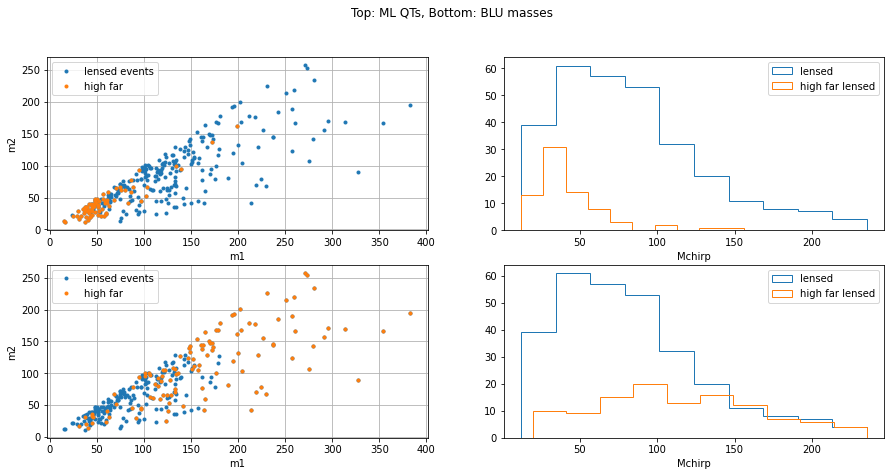

In [36]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(df_lensed['mchirp'],density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['mchirp'],density=False,histtype='step',label='high far lensed')
plt.xlabel('Mchirp')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(df_lensed['mchirp'],density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['mchirp'],density=False,histtype='step',label='high far lensed')
plt.xlabel('Mchirp')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

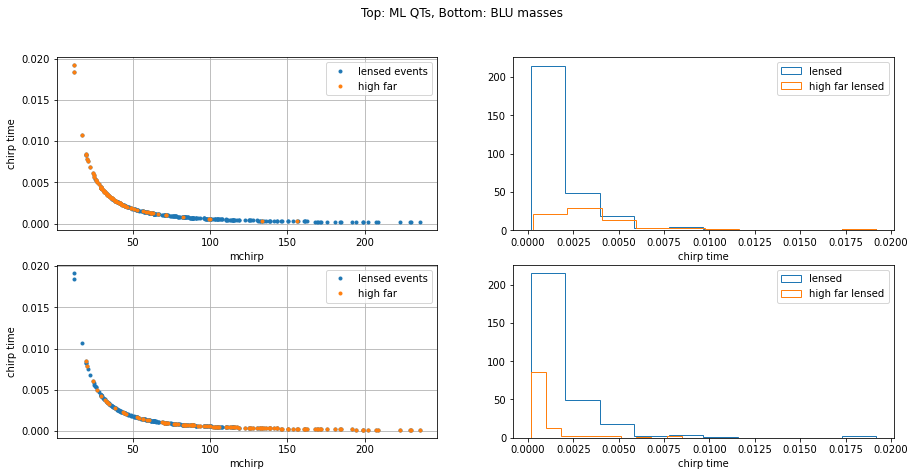

In [37]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()

plt.subplot(221)
plt.plot(df_lensed['mchirp'],df_lensed['chirp_time'],'.',label='lensed events')
plt.plot(df_lensed_high_far['mchirp'],df_lensed_high_far['chirp_time'],'.',label='high far')
plt.xlabel('mchirp')
plt.ylabel('chirp time')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(df_lensed['chirp_time'],density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['chirp_time'],density=False,histtype='step',label='high far lensed')
plt.xlabel('chirp time')
plt.legend()

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(df_lensed['mchirp'],df_lensed['chirp_time'],'.',label='lensed events')
plt.plot(df_lensed_high_far['mchirp'],df_lensed_high_far['chirp_time'],'.',label='high far')
plt.xlabel('mchirp')
plt.ylabel('chirp time')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(df_lensed['chirp_time'],density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['chirp_time'],density=False,histtype='step',label='high far lensed')
plt.xlabel('chirp time')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

In [38]:
df_lensed['snr_0']=lensed_data_haris['snr'][df_lensed['inj_id']][:,0]
df_lensed['snr_1']=lensed_data_haris['snr'][df_lensed['inj_id']][:,1]
df_lensed['snr_total'] = df_lensed['snr_0']+df_lensed['snr_1']

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

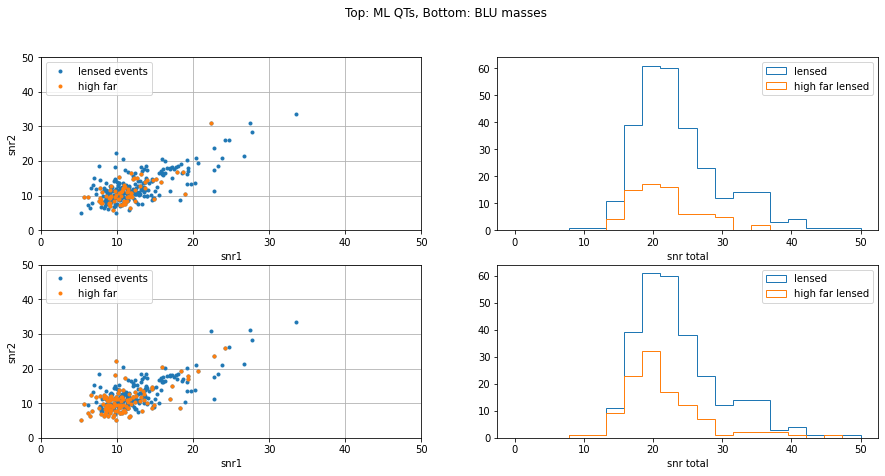

In [39]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(df_lensed['snr_0'],df_lensed['snr_1'],'.',label='lensed events')
plt.plot(df_lensed_high_far['snr_0'],df_lensed_high_far['snr_1'],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(df_lensed['snr_total'],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['snr_total'],bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.subplot(223)

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
plt.plot(df_lensed['snr_0'],df_lensed['snr_1'],'.',label='lensed events')
plt.plot(df_lensed_high_far['snr_0'],df_lensed_high_far['snr_1'],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(224)
plt.hist(df_lensed['snr_total'],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['snr_total'],bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

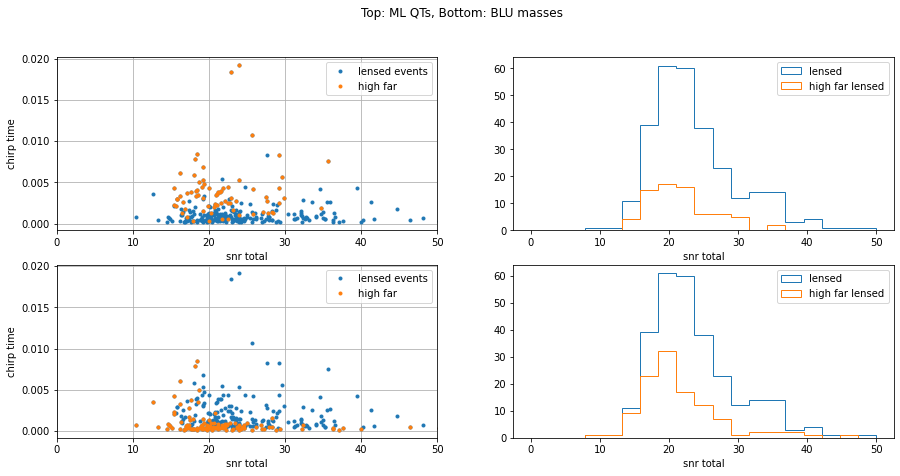

In [40]:
plt.figure(figsize=(15,7))
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(df_lensed['snr_total'],df_lensed['chirp_time'],'.',label='lensed events')
plt.plot(df_lensed_high_far['snr_total'],df_lensed_high_far['chirp_time'],'.',label='high far')
plt.xlabel('snr total')
plt.ylabel('chirp time')
plt.legend()
plt.grid()
plt.xlim(0,50)
#plt.ylim(0,50)
plt.subplot(222)
plt.hist(df_lensed['snr_total'],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['snr_total'],bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.subplot(223)

blu_stat='m1, m2'
df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
plt.plot(df_lensed['snr_total'],df_lensed['chirp_time'],'.',label='lensed events')
plt.plot(df_lensed_high_far['snr_total'],df_lensed_high_far['chirp_time'],'.',label='high far')
plt.xlabel('snr total')
plt.ylabel('chirp time')
plt.legend()
plt.grid()
plt.xlim(0,50)
#plt.ylim(0,50)
plt.subplot(224)
plt.hist(df_lensed['snr_total'],bins=bins,density=False,histtype='step',label='lensed')
plt.hist(df_lensed_high_far['snr_total'],bins=bins,density=False,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML QTs, Bottom: BLU masses')
plt.show()

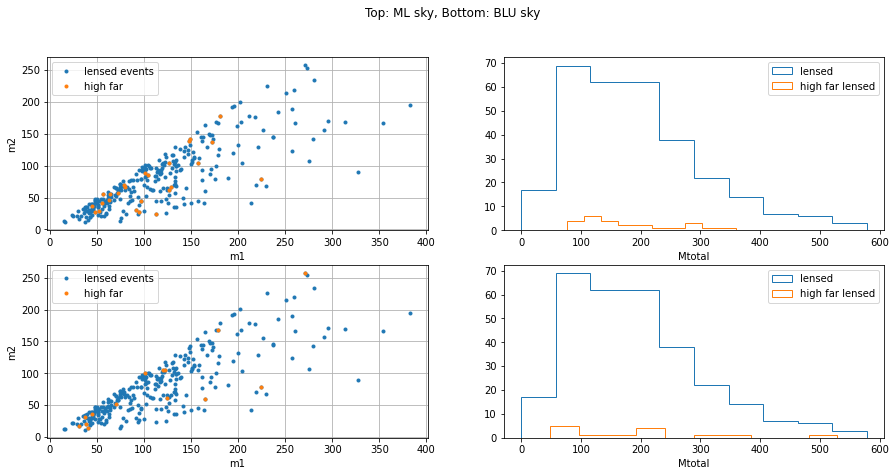

In [41]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

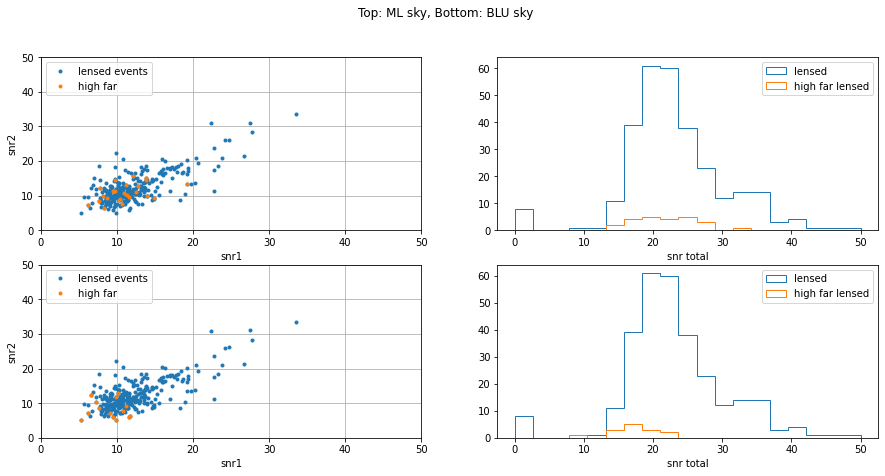

In [42]:
plt.figure(figsize=(15,7))
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'

df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-1].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML sky, Bottom: BLU sky')
plt.show()

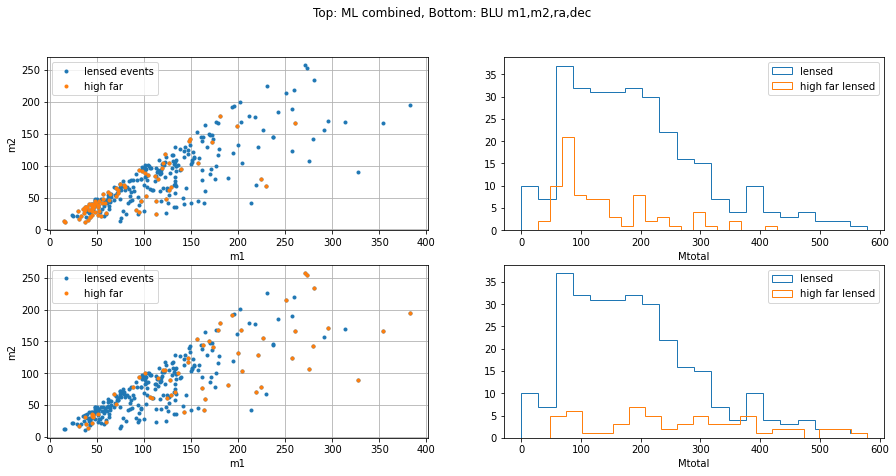

In [43]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'

plt.figure(figsize=(15,7))
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]
bs=20
plt.subplot(221)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(222)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-2].reset_index()
mtotal_high_fars=lensed_data_haris['m1'][df_lensed_high_far['inj_id']]+lensed_data_haris['m2'][df_lensed_high_far['inj_id']]

plt.subplot(223)
plt.plot(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']],'.',label='lensed events')
plt.plot(lensed_data_haris['m1'][df_lensed_high_far['inj_id']],lensed_data_haris['m2'][df_lensed_high_far['inj_id']],'.',label='high far')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['m1']+lensed_data_haris['m2'],bs,density=False,histtype='step',label='lensed')
plt.hist(mtotal_high_fars,bs,density=False,histtype='step',label='high far lensed')
plt.xlabel('Mtotal')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

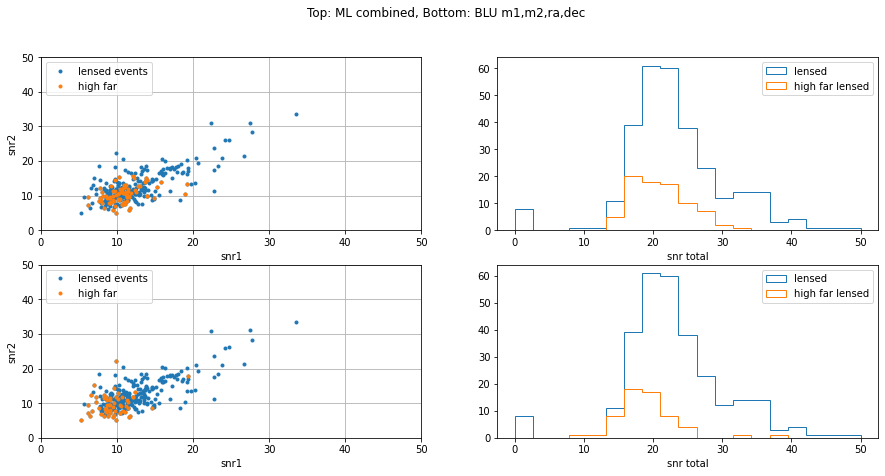

In [44]:
plt.figure(figsize=(15,7))
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'


df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-2].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]
bins=np.linspace(0,50,20)
plt.subplot(221)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.legend()
plt.grid()
plt.xlim(0,50)
plt.ylim(0,50)
plt.subplot(222)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()

df_lensed_high_far=df_lensed[df_lensed[blu_stat+'_fpp']>1e-2].reset_index()
snrtotal_high_fars=lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0]+lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1]

plt.subplot(223)
plt.plot(lensed_data_haris['snr'][df_lensed['inj_id']][:,0],lensed_data_haris['snr'][df_lensed['inj_id']][:,1],'.',label='lensed events')
plt.plot(lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,0],lensed_data_haris['snr'][df_lensed_high_far['inj_id']][:,1],'.',label='high far')
plt.xlabel('snr1')
plt.ylabel('snr2')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.grid()
plt.subplot(224)
plt.hist(lensed_data_haris['snr'][:,0]+lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='lensed')
plt.hist(snrtotal_high_fars,bins=bins,histtype='step',label='high far lensed')
plt.xlabel('snr total')
plt.legend()
plt.suptitle('Top: ML combined, Bottom: BLU m1,m2,ra,dec')
plt.show()

In [45]:
ml_stat='xgb_dense_QTS_0'
df_lensed_high_far=df_lensed[df_lensed[ml_stat+'_fpp']>1e-1].reset_index()
df_lensed_high_far['event_tag'].values

array(['3_329', '7_2286', '5_3809', '10_1821', '4_85', '6_5368', '8_529',
       '7_2065', '8_67', '6_1278', '5_6903', '1_21', '4_7346', '3_36',
       '11_1242', '11_453', '6_827', '6_776', '4_1653', '6_1249', '7_1',
       '5_1136', '1_465', '5_941', '8_62', '1_23', '10_203', '8_2974',
       '11_330', '7_597', '10_2304', '10_514', '4_270', '2_454',
       '11_2586', '6_222', '9_317', '7_0', '10_8779', '10_1117', '6_9823',
       '7_12103', '10_1887', '10_226', '9_7347', '2_84', '9_11', '9_5658',
       '9_201', '8_600', '10_33', '11_38', '1_493', '10_804', '2_674',
       '5_68', '9_276', '10_599', '4_489', '6_13', '6_5887', '5_4766',
       '1_6221', '8_2956', '7_1530', '7_1021', '9_1317', '4_458',
       '10_5756', '9_0', '9_327', '6_42', '6_16'], dtype=object)

In [46]:
#https://www.kaggle.com/srashtigoyal/dnn-skymaps-sklearn-with-prob-distance-metrics

In [47]:
snr_total = lensed_data_haris['snr'][df_lensed['inj_id']][:,0]+ lensed_data_haris['snr'][df_lensed['inj_id']][:,1]

In [48]:
mtotal=lensed_data_haris['m1'][df_lensed['inj_id']]+lensed_data_haris['m2'][df_lensed['inj_id']]

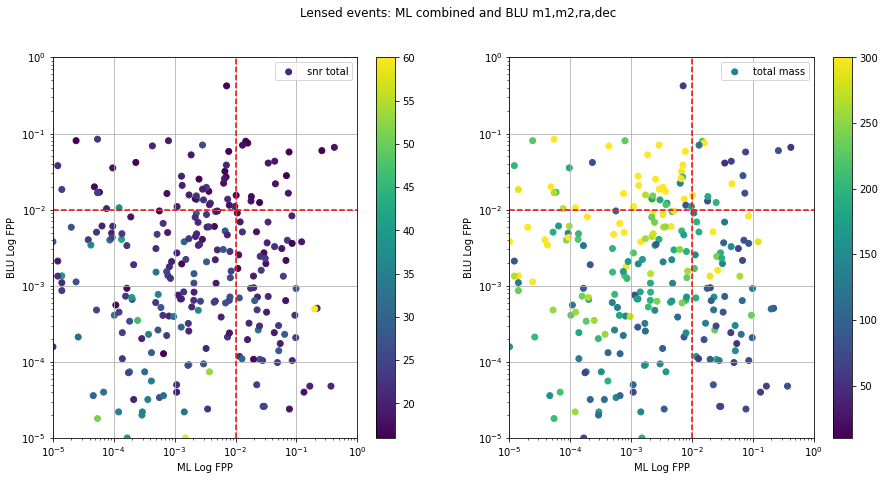

In [49]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
#ml_stat='xgb_dense_QTS_0'
#blu_stat='m1, m2'

plt.figure(figsize=(15,7))
plt.subplot(121)
#df=df_test[df_test['Lensing'] == 0]
#plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r',ls='dashed')
plt.axhline(1e-2,color='r',ls='dashed')

plt.loglog(10**bins,10**bins,'k--')
#df=df_test[df_test['Lensing'] == 1]
plt.scatter(df_lensed[ml_stat+'_fpp'],df_lensed[blu_stat+'_fpp'],c=(snr_total),label='snr total')
plt.colorbar()
plt.clim(16,60)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('Lensed events: ML combined and BLU m1,m2,ra,dec')



plt.subplot(122)
#df=df_test[df_test['Lensing'] == 0]
#plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r',ls='dashed')
plt.axhline(1e-2,color='r',ls='dashed')

plt.loglog(10**bins,10**bins,'k--')
#df=df_test[df_test['Lensing'] == 1]
plt.scatter(df_lensed[ml_stat+'_fpp'],df_lensed[blu_stat+'_fpp'],c=mtotal,label='total mass')
plt.colorbar()
plt.clim(10,300)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()

plt.show()

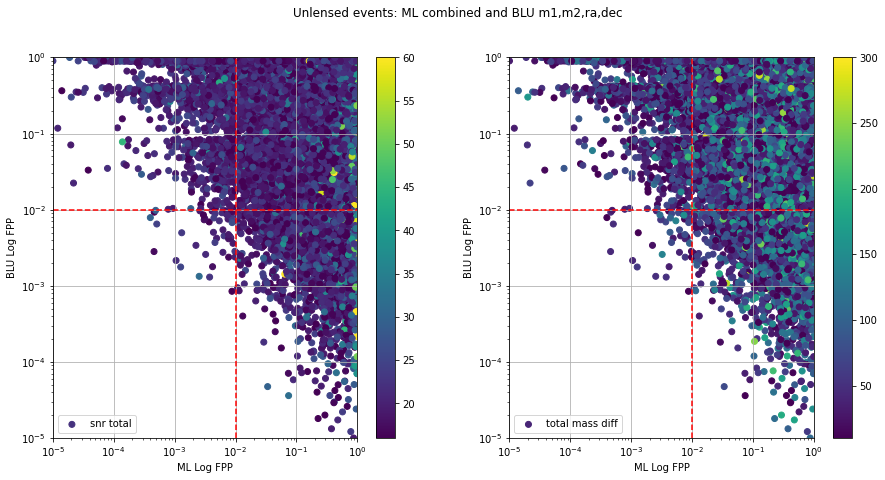

In [50]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(15,7))
plt.subplot(121)
#df=df_test[df_test['Lensing'] == 0]
#plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r',ls='dashed')
plt.axhline(1e-2,color='r',ls='dashed')

plt.loglog(10**bins,10**bins,'k--')
#df=df_test[df_test['Lensing'] == 1]
plt.scatter(df_unlensed[ml_stat+'_fpp'],df_unlensed[blu_stat+'_fpp'],c=df_unlensed['snr_total'],label='snr total')
plt.colorbar()
plt.clim(16,60)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()
plt.suptitle('Unlensed events: ML combined and BLU m1,m2,ra,dec')



plt.subplot(122)
#df=df_test[df_test['Lensing'] == 0]
#plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
plt.axvline(1e-2,color='r',ls='dashed')
plt.axhline(1e-2,color='r',ls='dashed')

plt.loglog(10**bins,10**bins,'k--')
#df=df_test[df_test['Lensing'] == 1]
plt.scatter(df_unlensed[ml_stat+'_fpp'],df_unlensed[blu_stat+'_fpp'],c=np.abs(df_unlensed['mtotal_0']-df_unlensed['mtotal_1']),label='total mass diff')
plt.colorbar()
plt.clim(10,300)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('ML Log FPP')
plt.ylabel('BLU Log FPP')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.grid()

plt.show()

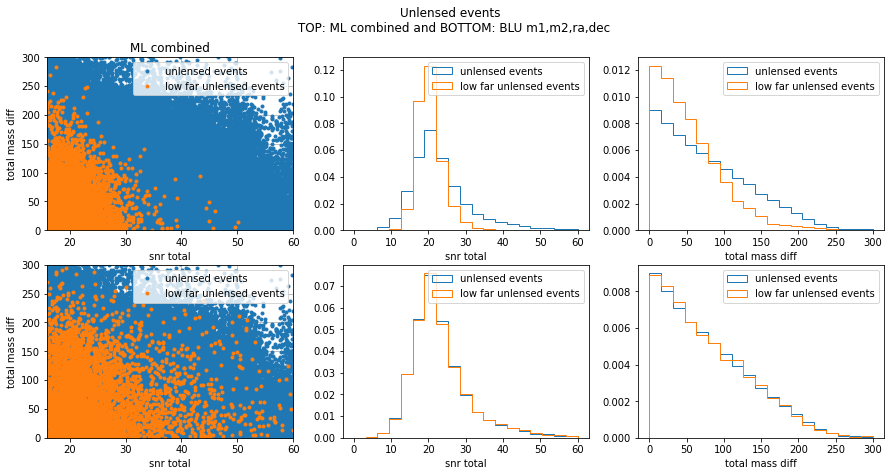

In [51]:
plt.figure(figsize=(15,7))
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
#ml_stat='xgb_dense_QTS_0'
#blu_stat='m1, m2'

#ml_stat='xgb_pred_bayestar_skymaps'
#blu_stat= 'ra, sin_dec'
density=True
plt.subplot(231)
df_unlensed_low_far=df_unlensed[df_unlensed[ml_stat+'_fpp']<1e-2].reset_index()
plt.plot(df_unlensed['snr_total'],np.abs(df_unlensed['mtotal_0']-df_unlensed['mtotal_1']),'.',label='unlensed events')
plt.plot(df_unlensed_low_far['snr_total'],np.abs(df_unlensed_low_far['mtotal_0']-df_unlensed_low_far['mtotal_1']),'.',label='low far unlensed events')
plt.xlabel('snr total')
plt.ylabel('total mass diff')
plt.legend()
plt.grid()
plt.xlim(16,60)
plt.ylim(0,300)
plt.title('ML combined')

plt.subplot(232)
bins=np.linspace(0,60,20)
plt.hist(df_unlensed['snr_total'],bins=bins,histtype='step',density=density,label='unlensed events')
plt.hist(df_unlensed_low_far['snr_total'],bins=bins,histtype='step',density=density,label='low far unlensed events')
plt.xlabel('snr total')
plt.legend()


plt.subplot(233)
bins=np.linspace(0,300,20)
plt.hist(np.abs(df_unlensed['mtotal_0']-df_unlensed['mtotal_1']),bins=bins,density=density,histtype='step',label='unlensed events')
plt.hist(np.abs(df_unlensed_low_far['mtotal_0']-df_unlensed_low_far['mtotal_1']),bins=bins,density=density,histtype='step',label='low far unlensed events')
plt.xlabel('total mass diff')

plt.legend()

plt.subplot(234)
df_unlensed_low_far=df_unlensed[df_unlensed[blu_stat+'_fpp']<1e-2].reset_index()
bins=np.linspace(0,50,20)
plt.plot(df_unlensed['snr_total'],np.abs(df_unlensed['mtotal_0']-df_unlensed['mtotal_1']),'.',label='unlensed events')
plt.plot(df_unlensed_low_far['snr_total'],np.abs(df_unlensed_low_far['mtotal_0']-df_unlensed_low_far['mtotal_1']),'.',label='low far unlensed events')
plt.xlabel('snr total')
plt.ylabel('total mass diff')
plt.legend()
plt.grid()
plt.xlim(16,60)
plt.ylim(0,300)

plt.subplot(235)
bins=np.linspace(0,60,20)
plt.hist(df_unlensed['snr_total'],bins=bins,histtype='step',density=density,label='unlensed events')
plt.hist(df_unlensed_low_far['snr_total'],bins=bins,histtype='step',density=density,label='low far unlensed events')
plt.xlabel('snr total')
plt.legend()


plt.subplot(236)
bins=np.linspace(0,300,20)
plt.hist(np.abs(df_unlensed['mtotal_0']-df_unlensed['mtotal_1']),bins=bins,density=density,histtype='step',label='unlensed events')
plt.hist(np.abs(df_unlensed_low_far['mtotal_0']-df_unlensed_low_far['mtotal_1']),bins=bins,density=density,histtype='step',label='low far unlensed events')
plt.xlabel('total mass diff')
plt.legend()


plt.suptitle('Unlensed events \n TOP: ML combined and BOTTOM: BLU m1,m2,ra,dec')

plt.show()


### Check Bayestar skymaps and QTs of events with very different BLU v/s ML FPPs


In [52]:
ml_stat='xgb_dense_QTS_0'
blu_stat = 'm1, m2'
blu_low_fpp=(df_lensed[ml_stat+'_fpp']>1e-2) & (df_lensed[blu_stat+'_fpp']<1e-4)
ml_low_fpp=(df_lensed[ml_stat+'_fpp']<1e-4) & (df_lensed[blu_stat+'_fpp']>1e-2)


In [53]:
df_lensed[blu_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag,mtotal,mchirp,chirp_time,snr_0,snr_1,snr_total
459073,9_0_907584501.910408258-2,9_0_907570447.420640707-0,1,53.639404,0.432488,24.910175,0.19582,1.988106e+07,5.615212e+06,430.525972,...,0.079626,0.093012,272,9_0,28.140511,12.11645,0.019199,10.877341,13.115653,23.992994


In [54]:
df_lensed[ml_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag,mtotal,mchirp,chirp_time,snr_0,snr_1,snr_total
77692,7_8157_877110891.897587776-2,7_8157_876593834.016572713-0,1,0.790226,0.006371,0.004900,0.082659,2.491039e+01,36.372889,4.758900,...,2.583545,0.070973,298,7_8157,421.896596,171.65110,0.000231,6.724483,7.748176,14.472660
216547,3_544_544363847.739058256-1,3_544_544347882.797658801-2,1,22.178672,0.178824,5.957423,0.136141,9.304825e+04,57439.137705,334.531050,...,0.461801,0.006066,270,3_544,201.927330,82.07316,0.000792,18.008762,18.550724,36.559486
236490,11_1016_624394000.582134723-1,11_1016_624393966.373340368-2,1,38.304256,0.308843,15.334536,0.089946,4.850471e+06,327089.908871,532.256478,...,2.628213,0.059378,22,11_1016,190.361904,74.86263,0.000923,27.512818,31.115510,58.628328
377143,6_18662_828446511.984032154-1,6_18662_828446424.003375530-2,1,224.258277,1.808168,52.426300,0.238822,5.577105e+02,5737.417332,75.734767,...,27.085327,3.366420,149,6_18662,266.919356,114.65680,0.000453,22.766169,17.451961,40.218130


In [55]:
#data_dir_qt = '/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/data/qts/test/' #Alice
data_dir_qt = '/home/srashti.goyal/alice_data_lensid/qts/test/' #Alice


In [56]:

def load_qts(data_dir,tag):
    plt.figure(figsize=(20,10))
    plt.subplot(131)
    det='H1'
    fname = data_dir + det + '/' + tag + '.png'
    img_0=plt.imread(fname)
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)
    plt.subplot(132)
    det='L1'
    fname = data_dir + det + '/' + tag + '.png'
    img_0=plt.imread(fname)
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)

    plt.subplot(133)
    det='V1'
    fname = data_dir + det + '/' + tag+ '.png'
    img_0=plt.imread(fname)
    
    plt.imshow(img_0)
    plt.title(tag + '  ' + det)

    plt.show()

15.9555014609 12.1850090708


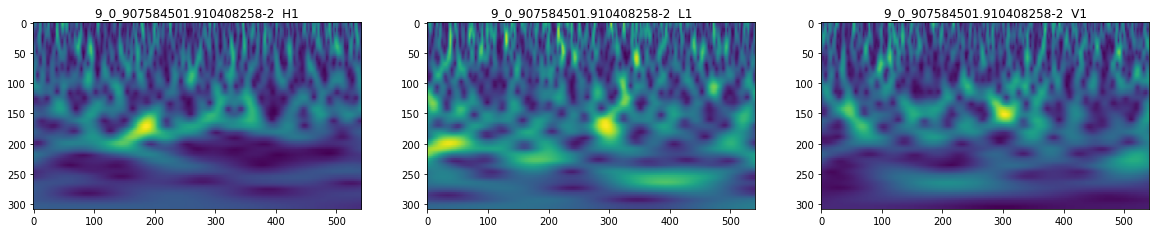

In [57]:
index=0
df=df_lensed[blu_low_fpp]
tag_0=df['img_0'].values[index]
tag_1=df['img_1'].values[index]
print(lensed_data_haris['m1'][df['inj_id'].values[index]],lensed_data_haris['m2'][df['inj_id'].values[index]])
load_qts(data_dir=data_dir_qt,tag=tag_0)

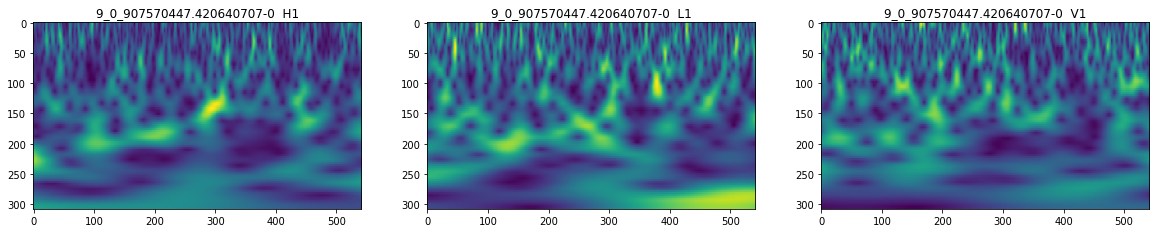

In [58]:
load_qts(data_dir=data_dir_qt,tag=tag_1)

153.166209682 113.753146626


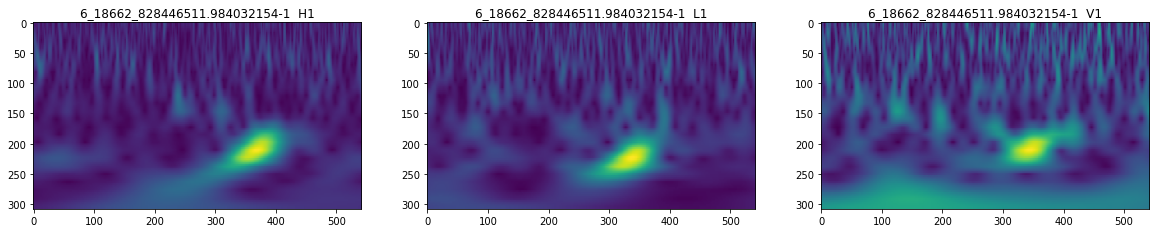

In [59]:
index=3
df=df_lensed[ml_low_fpp]

tag_0=df['img_0'].values[index]
tag_1=df['img_1'].values[index]
print(lensed_data_haris['m1'][df['inj_id'].values[index]],lensed_data_haris['m2'][df['inj_id'].values[index]])

load_qts(data_dir=data_dir_qt,tag=tag_0)

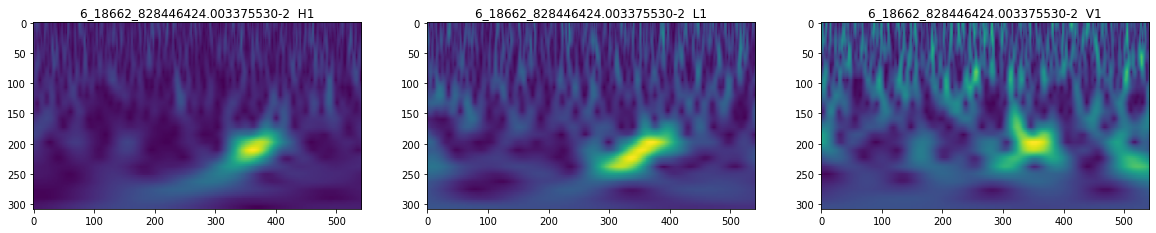

In [60]:
load_qts(data_dir=data_dir_qt,tag=tag_1)

In [61]:
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
blu_low_fpp=(df_lensed[ml_stat+'_fpp']>1e-2) & (df_lensed[blu_stat+'_fpp']<1e-4)
ml_low_fpp=(df_lensed[ml_stat+'_fpp']<1e-4) & (df_lensed[blu_stat+'_fpp']>1e-2)


In [62]:
df_lensed[blu_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag,mtotal,mchirp,chirp_time,snr_0,snr_1,snr_total
166751,8_62_980340398.820162415-1,8_62_980339723.505194902-2,1,9.149068,0.073768,1.994269,0.100844,2.161387e+08,4.296657e+07,2611.823462,...,0.098848,0.061801,205,8_62,48.986759,17.21925,0.010688,10.301143,15.309316,25.610459
170123,11_330_907968233.117979645-1,11_330_907967795.451250314-2,1,13.936695,0.112370,2.559471,0.154577,1.278437e+06,1.172562e+06,575.325296,...,2.579249,1.850229,187,11_330,81.846622,35.60663,0.003184,12.257560,15.216848,27.474407
216547,3_544_544363847.739058256-1,3_544_544347882.797658801-2,1,22.178672,0.178824,5.957423,0.136141,9.304825e+04,5.743914e+04,334.531050,...,0.461801,0.006066,270,3_544,201.927330,82.07316,0.000792,18.008762,18.550724,36.559486
236490,11_1016_624394000.582134723-1,11_1016_624393966.373340368-2,1,38.304256,0.308843,15.334536,0.089946,4.850471e+06,3.270899e+05,532.256478,...,2.628213,0.059378,22,11_1016,190.361904,74.86263,0.000923,27.512818,31.115510,58.628328
259781,6_1013_575119331.208349347-1,6_1013_575117637.739794254-2,1,0.588741,0.004747,0.011467,0.079860,4.192101e+08,2.385617e+06,564.267457,...,0.664641,0.076395,269,6_1013,136.432261,42.66217,0.002356,12.737757,12.714617,25.452374
362618,4_489_808366366.059612870-1,4_489_808353825.978371381-2,1,0.819742,0.006609,0.008256,0.049027,3.119208e+06,5.957636e+05,383.868861,...,0.887242,0.737690,77,4_489,74.453801,31.55595,0.003894,10.574640,10.974250,21.548891
459073,9_0_907584501.910408258-2,9_0_907570447.420640707-0,1,53.639404,0.432488,24.910175,0.195820,1.988106e+07,5.615212e+06,430.525972,...,0.079626,0.093012,272,9_0,28.140511,12.11645,0.019199,10.877341,13.115653,23.992994


In [63]:
df_lensed[ml_low_fpp]

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag,mtotal,mchirp,chirp_time,snr_0,snr_1,snr_total
6506,8_25245_815743505.159950137-1,8_25245_815743504.991253376-2,1,99.024413,0.798422,10.736553,0.134599,53.035743,82.959822,4.293717,...,89.465807,175.714681,231,8_25245,308.429758,125.57760,0.000390,9.738488,7.638389,17.376877
64524,1_1674_880899223.854309916-1,1_1674_880896130.203195333-2,1,153.733393,1.239534,27.500180,0.149241,984.155917,731.219375,3.207879,...,1.733120,1.501496,145,1_1674,84.615613,36.75095,0.003021,9.754530,9.491434,19.245964
187390,9_1203_721052364.946182370-1,9_1203_721039402.579273223-2,1,350.381790,2.825088,117.538788,0.139714,75.185471,124.797316,11.885252,...,12.045696,5.579384,99,9_1203,238.731953,95.97255,0.000610,11.431196,8.718620,20.149816
234023,6_12967_770632161.276382327-1,6_12967_770628032.365889906-2,1,9.665727,0.077934,0.516567,0.049443,912.759929,286.503814,9.849203,...,22.877846,0.651292,81,6_12967,390.352520,169.13810,0.000237,15.882304,20.493964,36.376268
250861,9_14299_651971048.385062694-1,9_14299_651970895.543521165-2,1,14.477781,0.116733,1.311089,0.035486,43.672442,111.294673,6.711138,...,37.563620,37.869963,40,9_14299,203.398223,83.52487,0.000769,10.645109,11.735385,22.380494
322545,9_201_955834186.212793707-1,9_201_955832471.876044988-2,1,329.069044,2.653245,26.364229,0.246812,1097.409158,658.297835,8.219674,...,3.557266,3.442400,201,9_201,94.588872,41.16951,0.002500,11.968835,9.594036,21.562871
468287,1_22141_963334191.420760154-1,1_22141_963334191.227844834-2,1,11.541266,0.093056,0.675928,0.031551,22.068427,34.031511,1.533836,...,37.583447,3.303357,3,1_22141,417.170682,143.33220,0.000313,11.460115,10.436418,21.896532


#### Runs on Alice

# Check for product of dense outputs performance instead for ML QTs

In [66]:
base_dir = '/home/srashti.goyal/strong-lensing-ml/' #CIT


#df_test=pd.read_csv(base_dir + 'data/dataframes/test/ML_combined_kaggle.csv',index_col=0)

#df_test= pd.read_csv('/home/srashti.goyal/lensid_runs/ML_1p0_AnalyticalPsd_whitened/dataframes/ML_qts_lr_fix.csv')

In [67]:
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

In [68]:
df_test['bhattacharya_coeff_inv'] = 1/df_test['bhattacharya_coeff']
df_test['mchirp_abs_diff_inv'] = 1/df_test['mchirp_abs_diff']



In [69]:
df_test['dense_HLV_product'] = df_test['dense_H1_0']*df_test['dense_L1_0']*df_test['dense_V1_0']
df_test['dense_HLV_sum'] = (df_test['dense_H1_0']+df_test['dense_L1_0']+df_test['dense_V1_0'])/3

In [70]:
import lensid.utils.ml_utils as ml


2022-04-13 01:12:27.237377: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/vpl/2022.0.0/lib:/opt/intel/oneapi/tbb/2021.5.1/env/../lib/intel64/gcc4.8:/opt/intel/oneapi/mkl/2022.0.2/lib/intel64:/opt/intel/oneapi/itac/2021.5.0/slib:/opt/intel/oneapi/ippcp/2021.5.1/lib/intel64:/opt/intel/oneapi/ipp/2021.5.2/lib/intel64:/opt/intel/oneapi/dnnl/2022.0.2/cpu_dpcpp_gpu_dpcpp/lib:/opt/intel/oneapi/debugger/2021.5.0/gdb/intel64/lib:/opt/intel/oneapi/debugger/2021.5.0/libipt/intel64/lib:/opt/intel/oneapi/debugger/2021.5.0/dep/lib:/opt/intel/oneapi/dal/2021.5.3/lib/intel64:/opt/intel/oneapi/compiler/2022.0.2/linux/lib:/opt/intel/oneapi/compiler/2022.0.2/linux/lib/x64:/opt/intel/oneapi/compiler/2022.0.2/linux/lib/oclfpga/host/linux64/lib:/opt/intel/oneapi/compiler/2022.0.2/linux/compiler/lib/intel64_lin:/opt/int

In [71]:
df_test['dense_HLV_product_fpp'] = ml.get_fars(df_test,'dense_HLV_product',df_test,'dense_HLV_product')
df_test['dense_HLV_sum_fpp'] = ml.get_fars(df_test,'dense_HLV_sum',df_test,'dense_HLV_sum')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


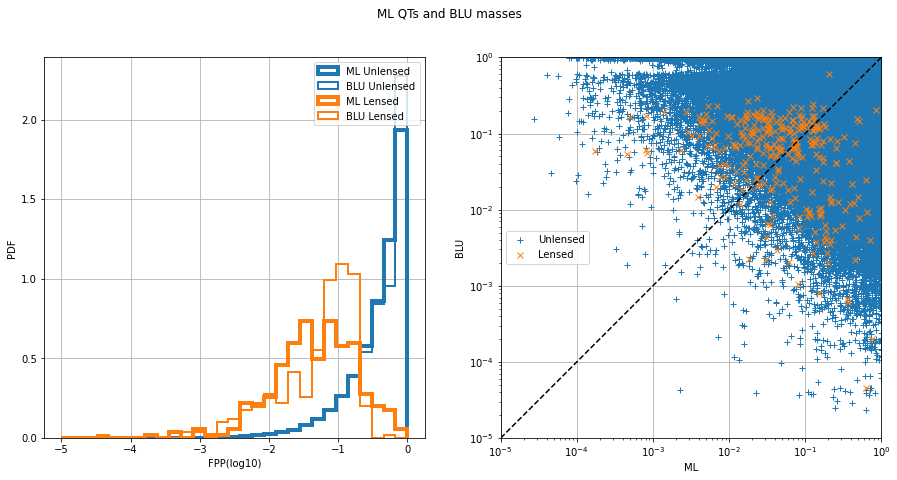

In [72]:
blu_stat='m1, m2'#'m1, m2'
ml_stat='dense_HLV_product'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

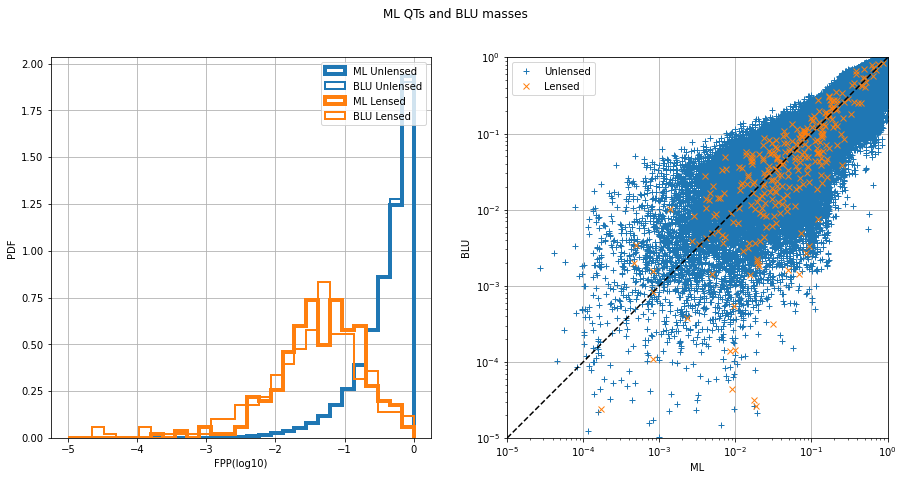

In [73]:
blu_stat='xgb_dense_QTS_0'#'m1, m2'
ml_stat='dense_HLV_product'
plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

dense_H1_0 auc = 0.8790
dense_L1_0 auc = 0.8695
dense_V1_0 auc = 0.8018
m1, m2 auc = 0.9164
xgb_dense_QTS_0 auc = 0.9040
dense_HLV_product auc = 0.8996


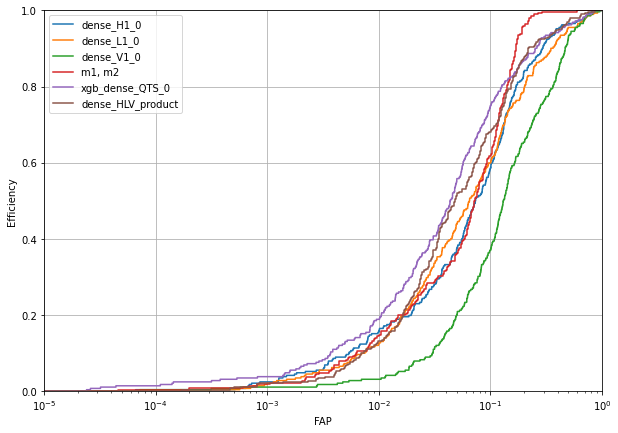

In [74]:
fig=ml.plot_ROCs(df_test,cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','m1, m2','xgb_dense_QTS_0','dense_HLV_product'])

dense_H1_0 auc = 0.8790
dense_L1_0 auc = 0.8695
dense_V1_0 auc = 0.8018
m1, m2 auc = 0.9164
xgb_dense_QTS_0 auc = 0.9040
dense_HLV_product auc = 0.8996
dense_HLV_sum auc = 0.9013
bhattacharya_coeff_inv auc = 0.8546
mchirp_abs_diff_inv auc = 0.7232


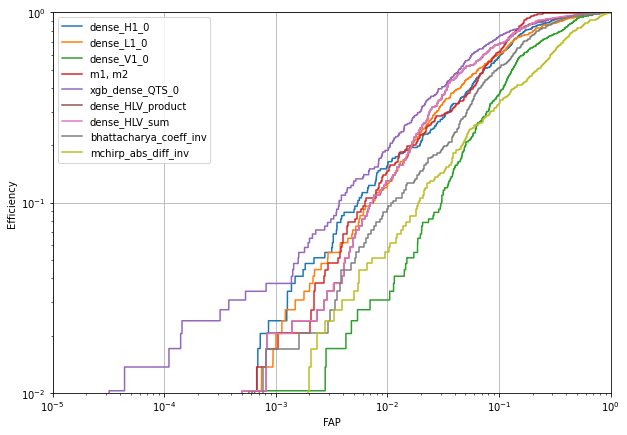

In [75]:
fig=ml.plot_ROCs(df_test,cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','m1, m2','xgb_dense_QTS_0','dense_HLV_product','dense_HLV_sum','bhattacharya_coeff_inv','mchirp_abs_diff_inv'],logy=True,ylim=1e-2)

In [76]:
df_test['blu_prod_m1m2_radec']=df_test['m1, m2']*df_test['ra, sin_dec']

In [77]:
df_test['ML_combined_dense_prod']=df_test['dense_HLV_product']*df_test['xgb_pred_bayestar_skymaps']

In [78]:
df_test['blu_prod_m1m2_radec_fpp'] = ml.get_fars(df_test,'blu_prod_m1m2_radec',df_test,'blu_prod_m1m2_radec')

m1, m2 auc = 0.9164
xgb_dense_QTS_0 auc = 0.9040
dense_HLV_product auc = 0.8996
ra, sin_dec auc = 0.9777
blu_prod_m1m2_radec auc = 0.9917
m1, m2, ra, sin_dec auc = 0.9909
ML_combined_dense_prod auc = 0.9783
xgb_pred_bayestar_skymaps auc = 0.9708


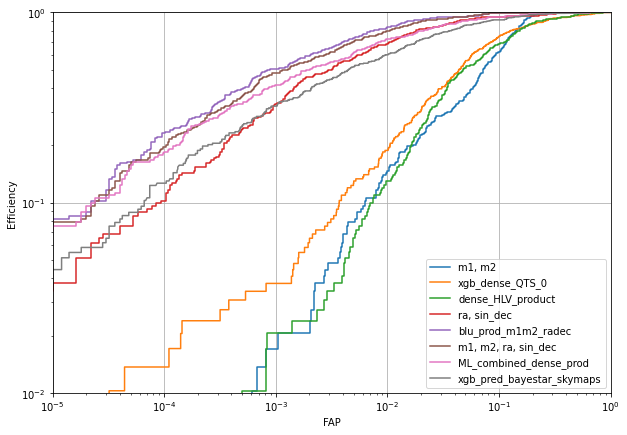

In [79]:
fig=ml.plot_ROCs(df_test,cols=['m1, m2','xgb_dense_QTS_0','dense_HLV_product','ra, sin_dec','blu_prod_m1m2_radec','m1, m2, ra, sin_dec','ML_combined_dense_prod','xgb_pred_bayestar_skymaps'],logy=True,ylim=1e-2)

In [80]:

#df_lensed['sig1_inj'] = 1.2e-4*(df_lensed['snr_1'])*(df_lensed['mchirp'])**(5./3)
#df_lensed['sig0_inj'] = 1.2e-4*(df_lensed['snr_0'])*(df_lensed['mchirp'])**(5./3)
df_unlensed['snr_0'] = unlensed_data_haris['snr'][df_unlensed['id_0']]
df_unlensed['snr_1'] = unlensed_data_haris['snr'][df_unlensed['id_1']]
#df_unlensed['sig1_inj'] = 1.2e-4*(df_unlensed['snr_1'])*(df_unlensed['mchirp_1'])**(5./3)

#df_unlensed['sig0_inj'] = 1.2e-4*(df_unlensed['snr_0'])*(df_unlensed['mchirp_0'])**(5./3)


randoms_unlensed=np.random.randn(len(unlensed_data_haris['snr']))
randoms_lensed=np.random.randn(len(df_lensed['snr_total']))

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:

#df_lensed['sig1_guess'] = 1.3e-4/(df_lensed['snr_1']-np.random.rand())*(df_lensed['mchirp'])**(5./3)
#df_lensed['sig0_guess'] = 1.3e-4/(df_lensed['snr_0']-np.random.rand())*(df_lensed['mchirp'])**(5./3)
df_lensed['sig1_inj'] = 0.08*8/(df_lensed['snr_1'])*df_lensed['mchirp']
df_lensed['sig0_inj'] = 0.08*8/(df_lensed['snr_0'])*df_lensed['mchirp']
df_unlensed['sig1_inj'] = 0.08*8/(df_unlensed['snr_1'])*df_unlensed['mchirp_1']
df_unlensed['sig0_inj'] = 0.08*8/(df_unlensed['snr_0'])*df_unlensed['mchirp_0']

#df_unlensed['sig1_guess'] = 1.3e-4/(df_unlensed['snr_1']-np.random.rand())*(df_unlensed['mchirp_1'])**(5./3)
#df_unlensed['sig0_guess'] = 1.3e-4/(df_unlensed['snr_0']-np.random.rand())*(df_unlensed['mchirp_0'])**(5./3)

df_lensed['guess_mchirp_0'] = df_lensed['sig0_inj']*randoms_lensed+ np.log(df_lensed['mchirp'])
df_lensed['guess_mchirp_1'] = df_lensed['sig1_inj']*randoms_lensed+ np.log(df_lensed['mchirp'])

df_unlensed['guess_mchirp_0'] = df_unlensed['sig0_inj']*randoms_unlensed[df_unlensed['id_0']]+ np.log(df_unlensed['mchirp_0'])
df_unlensed['guess_mchirp_1'] = df_unlensed['sig1_inj']*randoms_unlensed[df_unlensed['id_1']]+ np.log(df_unlensed['mchirp_1'])

df_lensed['sig1_guess'] = 0.08*8/(df_lensed['snr_1']-np.random.rand())*df_lensed['guess_mchirp_1']
df_lensed['sig0_guess'] = 0.08*8/(df_lensed['snr_0']-np.random.rand())*df_lensed['guess_mchirp_0']
df_unlensed['sig1_guess'] = 0.08*8/(df_unlensed['snr_1']-np.random.rand())*df_unlensed['guess_mchirp_1']
df_unlensed['sig0_guess'] = 0.08*8/(df_unlensed['snr_0']-np.random.rand())*df_unlensed['guess_mchirp_0']



/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py

In [82]:
df_test_new=pd.concat([df_lensed,df_unlensed])

In [83]:
def bhattacharya_dist(mu1,sig1,mu2,sig2):
    return 1/4 * np.log(1/4 * ((sig1/sig2)**2 + (sig2/sig1)**2 + 2 ) ) + 1/4 * ((mu1-mu2)**2) / (sig1**2 + sig2**2)


In [84]:
mu1=df_test_new['guess_mchirp_0']
mu2=df_test_new['guess_mchirp_1']

sig1=df_test_new['sig0_guess']


sig2=df_test_new['sig1_guess']



df_test_new['bhattacharya_coeff_guess'] = 1/bhattacharya_dist(mu1,sig1,mu2,sig2)

In [85]:
df_test_new=df_test_new[df_test_new['bhattacharya_coeff_guess'].isna()==False]

m1, m2 auc = 0.9164
xgb_dense_QTS_0 auc = 0.9040
bhattacharya_coeff_guess auc = 0.8410


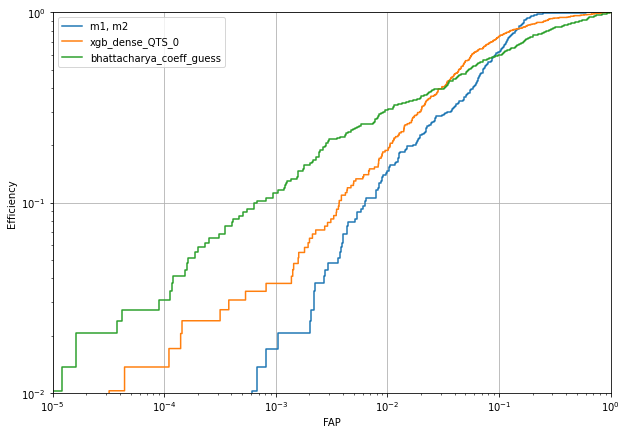

In [86]:
fig=ml.plot_ROCs(df_test_new,cols=['m1, m2','xgb_dense_QTS_0','bhattacharya_coeff_guess'],logy=True,ylim=1e-2)

In [87]:
df_lensed_new=df_test_new[df_test_new['Lensing'] ==1]
df_unlensed_new=df_test_new[df_test_new['Lensing'] ==0]




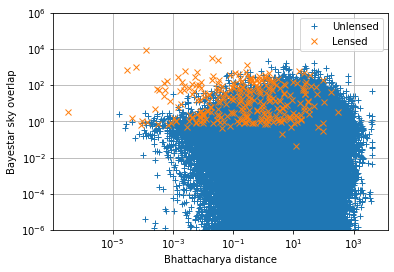

In [88]:
plt.loglog(1/df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['bayestar_skymaps_blu'],'+',label='Unlensed')
plt.loglog(1/df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['bayestar_skymaps_blu'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlabel('Bhattacharya distance')
plt.ylabel('Bayestar sky overlap')
plt.legend()
plt.grid()
plt.show()

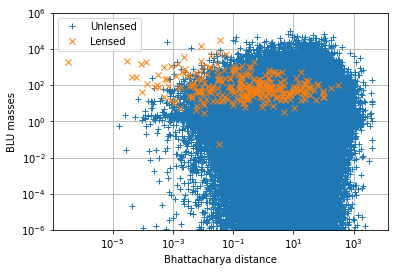

In [91]:
plt.loglog(1/df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['m1, m2'],'+',label='Unlensed')
plt.loglog(1/df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['m1, m2'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlabel('Bhattacharya distance')
plt.ylabel('BLU masses')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.loglog(1/df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['xgb_dense_QTS_0'],'+',label='Unlensed')
plt.loglog(1/df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['xgb_dense_QTS_0'],'x',label='Lensed')
plt.ylim(1e-4,1.5e0)
plt.xlabel('Bhattacharya distance')
plt.ylabel('ML QTs')
plt.legend()
plt.grid()
plt.show()

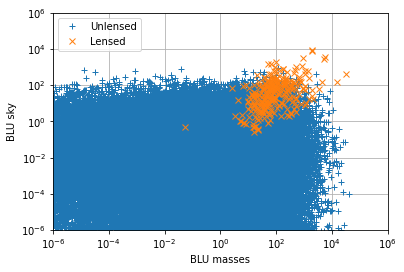

In [89]:
plt.loglog(df_unlensed_new['m1, m2'],df_unlensed_new['ra, sin_dec'],'+',label='Unlensed')
plt.loglog(df_lensed_new['m1, m2'],df_lensed_new['ra, sin_dec'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlim(1e-6,1e6)


plt.xlabel('BLU masses')
plt.ylabel('BLU sky')
plt.legend()
plt.grid()
plt.show()

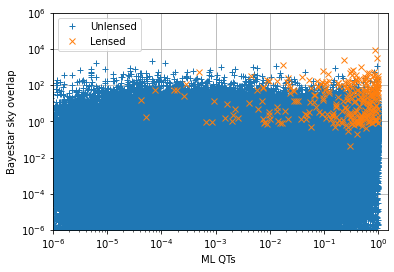

In [90]:
plt.loglog(df_unlensed_new['xgb_dense_QTS_0'],df_unlensed_new['bayestar_skymaps_blu'],'+',label='Unlensed')
plt.loglog(df_lensed_new['xgb_dense_QTS_0'],df_lensed_new['bayestar_skymaps_blu'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlim(1e-6,1.5e0)

plt.xlabel('ML QTs ')
plt.ylabel('Bayestar sky overlap')
plt.legend()
plt.grid()
plt.show()